In [102]:
#regression with support vector machine 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score,GridSearchCV
from sklearn.svm import SVC,SVR,LinearSVR
from sklearn.inspection import PartialDependenceDisplay
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv("c_slump.csv")

In [5]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [8]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [10]:
df.rename(columns={'FLOW(cm)':'Flow','Coarse Aggr.':'C_Aggr','Fine Aggr.':'F_Aggr','SLUMP(cm)':'Slump','Compressive Strength (28-day)(Mpa)':'Comp_Strength'}, inplace=True)


In [12]:
df.columns

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'C_Aggr', 'F_Aggr', 'Slump',
       'Flow', 'Comp_Strength'],
      dtype='object')

In [18]:
#drop_cols=['Shucked weight', 'Viscera weight', 'Shell weight']
#df=df.drop(drop_cols, axis=1)

<Axes: >

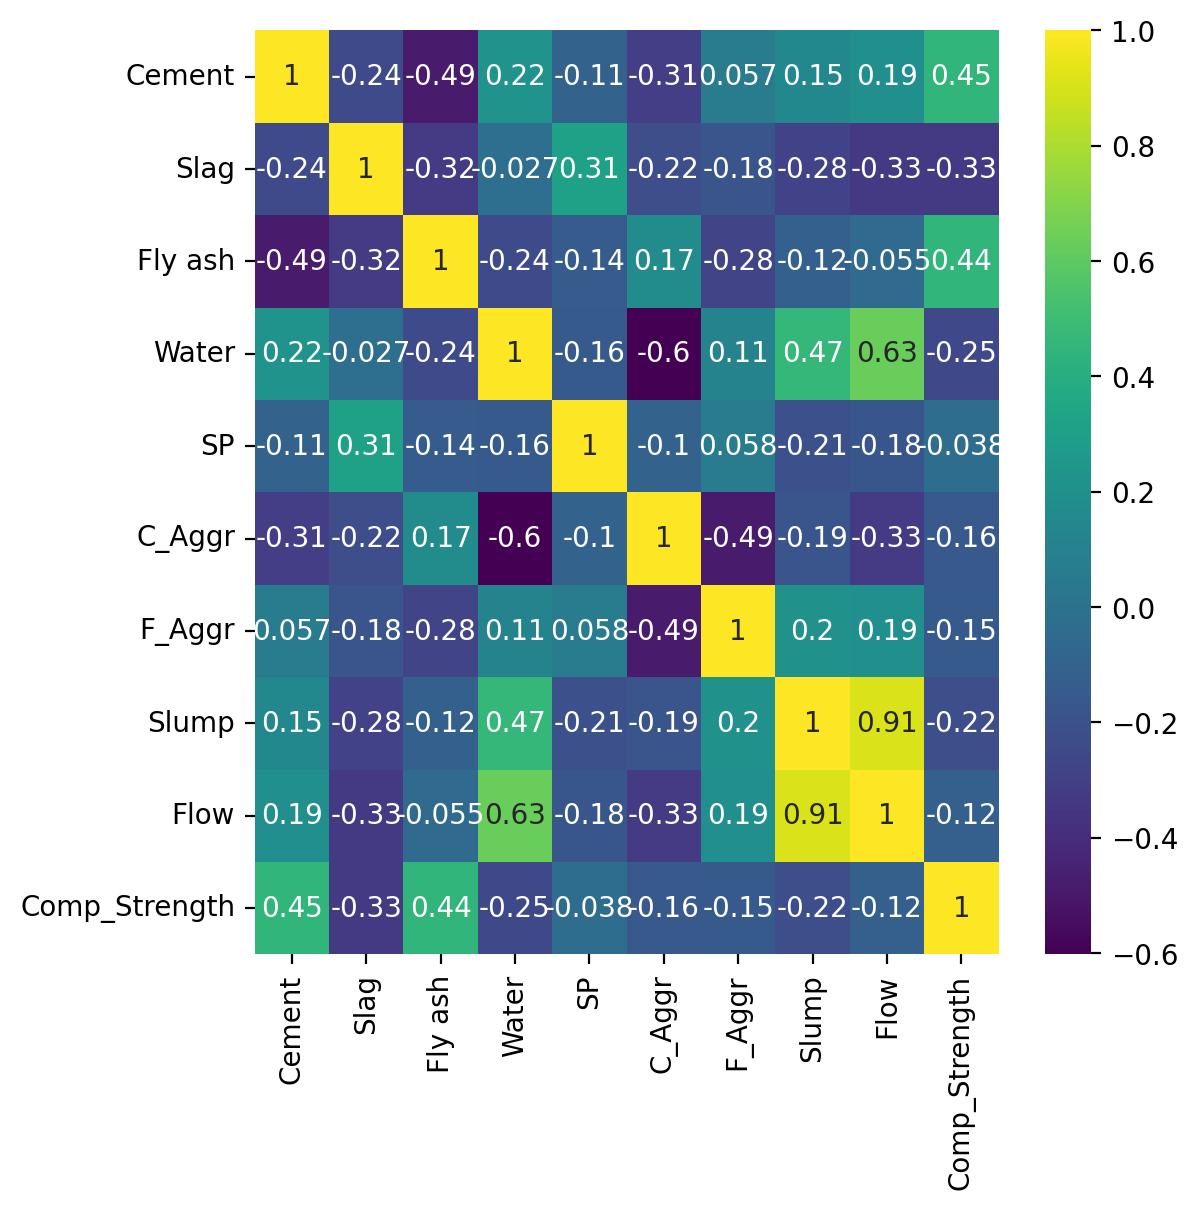

In [22]:
plt.figure(figsize=(6,6),dpi=200)
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [35]:
X = df.drop('Comp_Strength',axis=1)
y = df['Comp_Strength']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [39]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [41]:
base_model = SVR()

In [44]:
base_model.fit(scaled_X_train,y_train)

SVR()

In [57]:
base_preds = base_model.predict(scaled_X_test)

In [59]:
mean_absolute_error(y_test,base_preds)

5.170133933024929

In [61]:
np.sqrt(mean_squared_error(y_test,base_preds))

6.920167712673791

In [63]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [65]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [67]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [69]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'linear'}

In [140]:
grid_preds = grid.predict(scaled_X_test)

In [142]:
mean_absolute_error(y_test,grid_preds)

2.6824215381447396

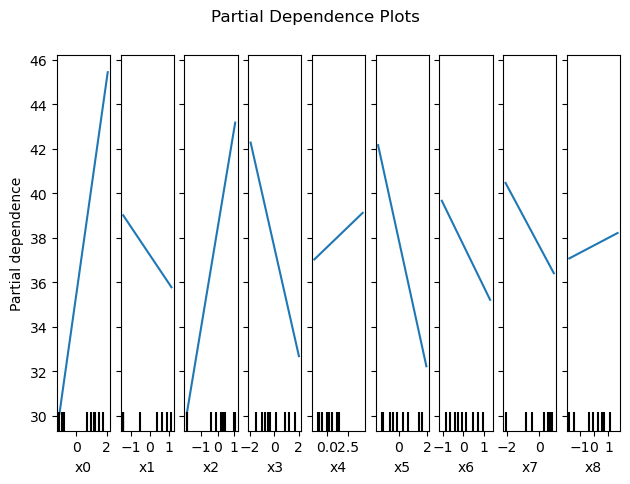

In [144]:
features = list(range(scaled_X_test.shape[1]))
feature_names = [f'Feature {i}' for i in features] 
PartialDependenceDisplay.from_estimator(grid.best_estimator_, scaled_X_test, features, n_cols=9)
plt.suptitle('Partial Dependence Plots', y=1)

plt.tight_layout()

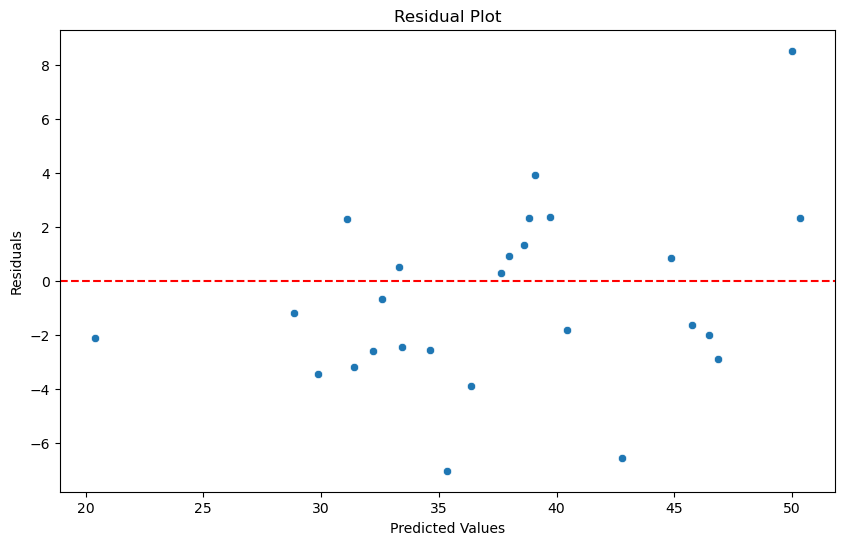

In [146]:
# Calculate residuals
residuals = y_test - grid_preds

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=grid_preds, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

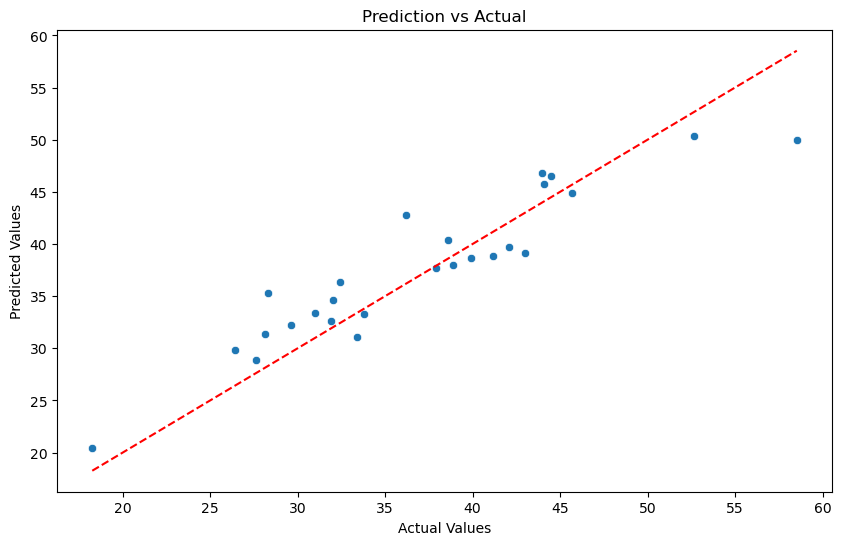

In [148]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=grid_preds)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Prediction vs Actual')
plt.show()